looking at labels sample of composers to determine best formatting/cleaning methods and whether there is benefit in using examples where labels were derived from secondary text fields.

In [27]:
import csv
import sys
from parseMetadata import fix_nulls
import matplotlib.pyplot as plt

composerDict = dict()
compCountSlim = 0
compCountDirty = 0
totalEntries = 0
csv.field_size_limit(sys.maxsize)


with open("metadata.csv",'r') as meta:
    csvreader1 = csv.reader(fix_nulls(meta))
    for line in csvreader1:
        if len(line[3])>1: compCountDirty+=1
        totalEntries+=1

with open("slim_metadata.csv",'r') as labels:
    csvreader = csv.reader(labels)
    for line in csvreader:
        compCountSlim+=1

        if composerDict.get(line[1]):
            composerDict[line[1]] = composerDict[line[1]] +1
        else:
            composerDict[line[1]] = 1

sortedComposersByCount1 = sorted(composerDict.items(), key =lambda x : x[1], reverse=True)
print(sortedComposersByCount1[:50])
print("\nNumber of unique composers found: " + str(len(sortedComposersByCount1)) + " from a total of " + str(compCountSlim) + " compositions")
print("Composers with more than 1 composition " + str(len([x for x in filter(lambda x: x[1]>1,sortedComposersByCount1)])) )
# print(*sortedComposersByCount[:100], sep = "\n")
print("Total entries = " + str(totalEntries))
print("dirty composers =" + str(compCountDirty))








[('J. S. Bach', 9498), ('Y. Kato  加藤 洋平', 5156), ('W. A. Mozart', 4758), ('P. F. Carera', 4438), ('T. Fox', 4081), ('L. V. Beethoven', 3994), ('J. Williams', 3082), ('K. Kondo', 3033), ('A. Vivaldi', 1403), ('J. Hisaishi', 1392), ('H. Zimmer', 1240), ('F. Schubert', 1226), ('W. Marshall', 1222), ('J. Pachelbel', 1138), ('A. Antão', 1132), ('J. Brahms', 1126), ('S. M. Kudlo', 1114), ('J. B. S. T. Page', 1069), ('N. Uematsu', 1046), ('F. Chopin', 1010), ('G. F. Handel', 1007), ('M. Kook', 987), ('E. Bingham-Kumpf', 977), ('A. Menken', 904), ('L. Cohen', 896), ('C. Miranda', 865), ('R. Djawadi', 864), ('R. Karle', 846), ('E. Sheeran', 845), ('N. Gow', 804), ('J. S. Skinner', 761), ('A. Walker', 754), ('Coldplay', 735), ('G. Holst', 711), ('J. Dowland', 709), ('T. Jokilehto', 700), ('F. Mercury', 690), ('H. Purcell', 669), ('A. L. Webber', 660), ('C. Debussy', 648), ('G. F. Händel', 644), ('J. Masuda', 633), ('G. Verdi', 633), ('Pentatonix', 633), ('S. Joplin', 630), ('Yiruma', 630), ('T. 

Inspecting distribution of composers

count plot for top 10 within whole dataset
[('J. S. Bach', 0.0128), ('Y. Kato  加藤 洋平', 0.0069), ('W. A. Mozart', 0.0064), ('P. F. Carera', 0.006), ('T. Fox', 0.0055), ('L. V. Beethoven', 0.0054), ('J. Williams', 0.0041), ('K. Kondo', 0.0041), ('A. Vivaldi', 0.0019), ('J. Hisaishi', 0.0019)]

Dist plot for top 10 within top 100
[('J. S. Bach', 0.0962), ('Y. Kato  加藤 洋平', 0.0522), ('W. A. Mozart', 0.0482), ('P. F. Carera', 0.045), ('T. Fox', 0.0414), ('L. V. Beethoven', 0.0405), ('J. Williams', 0.0312), ('K. Kondo', 0.0307), ('A. Vivaldi', 0.0142), ('J. Hisaishi', 0.0141)]
[('J. S. Bach', 0.2326), ('Y. Kato  加藤 洋平', 0.1263), ('W. A. Mozart', 0.1165), ('P. F. Carera', 0.1087), ('T. Fox', 0.0999), ('L. V. Beethoven', 0.0978), ('J. Williams', 0.0755), ('K. Kondo', 0.0743), ('A. Vivaldi', 0.0344), ('J. Hisaishi', 0.0341)]


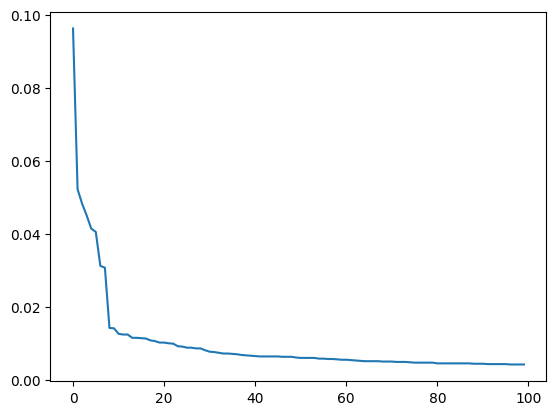

In [23]:
sortedComposersByCount1Dist = [(x[0],round(x[1]/compCountSlim,4)) for x in sortedComposersByCount1[:100]]
distWithinTop100 = [(x[0],round(x[1]/sum([x[1] for x in sortedComposersByCount1[:100]]),4)) for x in sortedComposersByCount1[:100]]


print("count plot for top 10 within whole dataset")
print(sortedComposersByCount1Dist[:10])
# p1 = plt.plot([i for i,x in enumerate(sortedComposersByCount1[:100])],[x[1] for x in sortedComposersByCount1[:100]])
# print(p1)

print("\nDist plot for top 10 within top 100")
print(distWithinTop100[:10])
p2 = plt.plot([i for i,x in enumerate(distWithinTop100)],[x[1] for x in distWithinTop100])
print(p2)

distWithinTop10 = [(x[0],round(x[1]/sum([x[1] for x in sortedComposersByCount1[:10]]),4)) for x in sortedComposersByCount1[:10]]
print(distWithinTop10)


In [74]:
sortedComposersByName = sorted(composerDict.items(), key =lambda x : x[0])
# print(*[ x[0] for x in sortedComposersByName],sep = '\n')
print([ x[0] for x in sortedComposersByName][:10])

composerWords = [[x for x in word[0].split(" ")] for word in sortedComposersByName]
composerWords = [item for sublist in composerWords for item in sublist if item]
# print(composerWords)
wordCountDict = dict()
for word in composerWords:
    if wordCountDict.get(str(word)):
        wordCountDict[word] = wordCountDict[word]+1
    else:
        wordCountDict[word] = 1
print("\nTop words in sample:")
print(sorted(wordCountDict.items(), key =lambda x : x[1],reverse=True)[:40])

['A-30; M. Wackenheim', 'A-40; J. J. Rioux', 'A-57-2; L. Grzybowski; Strophes', 'A-57-2; Strophes; L. Grzybowski', 'A-Ah', 'A-Comp', 'A-Dorian', 'A-Dur', 'A-Galope', 'A-Ha']

Top words in sample:
[('J.', 27771), ('A.', 27419), ('M.', 25837), ('S.', 20657), ('C.', 19241), ('D.', 18243), ('T.', 17781), ('B.', 15138), ('L.', 14822), ('R.', 14162), ('P.', 13131), ('E.', 13121), ('F.', 12691), ('G.', 12237), ('H.', 11493), ('K.', 10678), ('N.', 8635), ('W.', 7631), ('O.', 7280), ('I.', 6448), ('V.', 6435), ('Y.', 3482), ('Z.', 2093), ('U.', 1526), ('X.', 668), ('Q.', 639), ('作.', 500), ('М.', 476), ('А.', 456), ('Williams', 407), ('C', 382), ('Fox', 346), ('Smith', 288), ('작.', 273), ('С.', 270), ('В.', 265), ('B', 259), ('M', 246), ('Jr', 223), ('И.', 206)]


In [34]:
import csv
composerDictAll = dict()
compCountSlimAll = 0

with open("slim_all_fields_metadata.csv",'r') as labels:
    csvreader = csv.reader(labels)
    for line in csvreader:
        compCountSlimAll +=1
        if composerDictAll.get(line[1]):
            composerDictAll[line[1]] = composerDictAll[line[1]] +1
        else:
            composerDictAll[line[1]] = 1


sortedComposersByCountAll = sorted(composerDictAll.items(), key =lambda x : x[1], reverse=True)
sortedComposersByCountAll.remove(('F. Oneill; F. Nordberg', 2675))
sortedComposersByCountAll.remove(('F. Nordberg', 1053))
sortedComposersByCountAll.append(('F. Nordberg', 1053+2675))
sortedComposersByCountAll = sorted(sortedComposersByCountAll, key =lambda x : x[1], reverse=True)


print(sortedComposersByCountAll[:50])
print("\nNumber of unique composers found: " + str(len(sortedComposersByCountAll)) + " from a total of " + str(compCountSlimAll) + " compositions")
print("Composers with more than 1 composition " + str(len([x for x in filter(lambda x: x[1]>1,sortedComposersByCountAll)])) )

# print(*sortedComposersByCount[:100], sep = "\n")

[('J. S. Bach', 9972), ('Y. Kato  加藤 洋平', 5156), ('W. A. Mozart', 4899), ('P. F. Carera', 4438), ('T. Fox', 4187), ('L. V. Beethoven', 4133), ('F. Nordberg', 3728), ('J. Williams', 3205), ('K. Kondo', 3066), ('J. Kerr', 2220), ('F. Titford-Mock', 1756), ('J. Campin', 1425), ('J. Hisaishi', 1425), ('A. Vivaldi', 1407), ('H. Zimmer', 1267), ('F. Schubert', 1232), ('W. Marshall', 1223), ('J. Pachelbel', 1141), ('A. Antão', 1132), ('J. Brahms', 1128), ('S. M. Kudlo', 1114), ('J. B. S. T. Page', 1069), ('R. Robinson', 1066), ('N. Uematsu', 1051), ('F. Chopin', 1024), ('G. F. Handel', 1022), ('M. Kook', 987), ('E. Bingham-Kumpf', 977), ('E. Sheeran', 944), ('C. H. Gabriel', 931), ('L. Cohen', 912), ('A. Menken', 909), ('R. Djawadi', 879), ('C. Miranda', 865), ('R. Karle', 846), ('N. Gow', 825), ('A. Walker', 802), ('J. S. Skinner', 762), ('Coldplay', 735), ('G. Holst', 734), ('J. Dowland', 722), ('J. Walsh', 718), ('T. Jokilehto', 700), ('F. Mercury', 691), ('H. Purcell', 684), ('C. Debussy'

[('J. S. Bach', 0.0114), ('Y. Kato  加藤 洋平', 0.0059), ('W. A. Mozart', 0.0056), ('P. F. Carera', 0.0051), ('T. Fox', 0.0048), ('L. V. Beethoven', 0.0047), ('F. Nordberg', 0.0043), ('J. Williams', 0.0037), ('K. Kondo', 0.0035), ('J. Kerr', 0.0025)]

Dist plot for top 10 within top 100
[('J. S. Bach', 0.0904), ('Y. Kato  加藤 洋平', 0.0467), ('W. A. Mozart', 0.0444), ('P. F. Carera', 0.0402), ('T. Fox', 0.0379), ('L. V. Beethoven', 0.0375), ('F. Nordberg', 0.0338), ('J. Williams', 0.029), ('K. Kondo', 0.0278), ('J. Kerr', 0.0201)]
[('J. S. Bach', 0.2216), ('Y. Kato  加藤 洋平', 0.1146), ('W. A. Mozart', 0.1089), ('P. F. Carera', 0.0986), ('T. Fox', 0.093), ('L. V. Beethoven', 0.0918), ('F. Nordberg', 0.0828), ('J. Williams', 0.0712), ('K. Kondo', 0.0681), ('J. Kerr', 0.0493)]


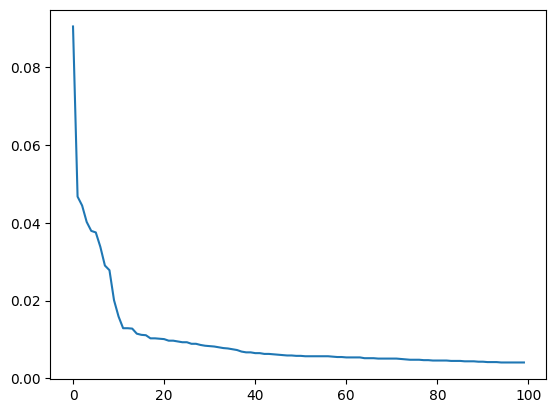

In [35]:


sortedComposersByCountAll1Dist = [(x[0],round(x[1]/compCountSlimAll,4)) for x in sortedComposersByCountAll[:100]]
distWithinTop100All = [(x[0],round(x[1]/sum([x[1] for x in sortedComposersByCountAll[:100]]),4)) for x in sortedComposersByCountAll[:100]]


# print("count plot for top 10 within whole dataset")
print(sortedComposersByCountAll1Dist[:10])
# p1 = plt.plot([i for i,x in enumerate(sortedComposersByCount1[:100])],[x[1] for x in sortedComposersByCount1[:100]])
# print(p1)

print("\nDist plot for top 10 within top 100")
print(distWithinTop100All[:10])
p2 = plt.plot([i for i,x in enumerate(distWithinTop100All)],[x[1] for x in distWithinTop100All])
print(p2)

distWithinTop10All = [(x[0],round(x[1]/sum([x[1] for x in sortedComposersByCountAll[:10]]),4)) for x in sortedComposersByCountAll[:10]]
print(distWithinTop10All)

Comparison of top 100 counts with and without metadata

In [78]:
[x for x in zip(sortedComposersByCount,sortedComposersByCount1)][:100]

[(('J. S. Bach', 9972), ('J. S. Bach', 9498)),
 (('Y. Kato  加藤 洋平', 5156), ('Y. Kato  加藤 洋平', 5156)),
 (('W. A. Mozart', 4899), ('W. A. Mozart', 4758)),
 (('P. F. Carera', 4438), ('P. F. Carera', 4438)),
 (('T. Fox', 4187), ('T. Fox', 4081)),
 (('L. V. Beethoven', 4133), ('L. V. Beethoven', 3994)),
 (('J. Williams', 3205), ('J. Williams', 3082)),
 (('K. Kondo', 3066), ('K. Kondo', 3033)),
 (('F. Oneill; F. Nordberg', 2675), ('A. Vivaldi', 1403)),
 (('J. Kerr', 2220), ('J. Hisaishi', 1392)),
 (('F. Titford-Mock', 1756), ('H. Zimmer', 1240)),
 (('J. Campin', 1425), ('F. Schubert', 1226)),
 (('J. Hisaishi', 1425), ('W. Marshall', 1222)),
 (('A. Vivaldi', 1407), ('J. Pachelbel', 1138)),
 (('H. Zimmer', 1267), ('A. Antão', 1132)),
 (('F. Schubert', 1232), ('J. Brahms', 1126)),
 (('W. Marshall', 1223), ('S. M. Kudlo', 1114)),
 (('J. Pachelbel', 1141), ('J. B. S. T. Page', 1069)),
 (('A. Antão', 1132), ('N. Uematsu', 1046)),
 (('J. Brahms', 1128), ('F. Chopin', 1010)),
 (('S. M. Kudlo', 1114)

Top 8 remain the same
<=5% increase for top 8

[(('J. S. Bach', 9972), ('J. S. Bach', 9498)),
 (('Y. Kato  加藤 洋平', 5156), ('Y. Kato  加藤 洋平', 5156)),
 (('W. A. Mozart', 4899), ('W. A. Mozart', 4758)),
 (('P. F. Carera', 4438), ('P. F. Carera', 4438)),
 (('T. Fox', 4187), ('T. Fox', 4081)),
 (('L. V. Beethoven', 4133), ('L. V. Beethoven', 3994)),
 (('J. Williams', 3205), ('J. Williams', 3082)),
 (('K. Kondo', 3066), ('K. Kondo', 3033)),


A quick glance at the differences in the remainder
Francis O'Neill / Frank Nordberg doesn't appear on the right but comes in top 9 on the left, O'Neill is a composer
the same for J. Kerr
Fynn Titford-Mock,J. Campin less known?
The rest of the lists seems to match

(('F. Oneill; F. Nordberg', 2675), ('A. Vivaldi', 1403)),
 (('J. Kerr', 2220), ('J. Hisaishi', 1392)),
 (('F. Titford-Mock', 1756), ('H. Zimmer', 1240)),
 (('J. Campin', 1425), ('F. Schubert', 1226)),
 (('J. Hisaishi', 1425), ('W. Marshall', 1222)),
 (('A. Vivaldi', 1407), ('J. Pachelbel', 1138)),
 (('H. Zimmer', 1267), ('A. Antão', 1132)),
 (('F. Schubert', 1232), ('J. Brahms', 1126)),
 (('W. Marshall', 1223), ('S. M. Kudlo', 1114)),
 (('J. Pachelbel', 1141), ('J. B. S. T. Page', 1069)),
 (('A. Antão', 1132), ('N. Uematsu', 1046)),
 (('J. Brahms', 1128), ('F. Chopin', 1010)),
 (('S. M. Kudlo', 1114), ('G. F. Handel', 1007)),
 (('J. B. S. T. Page', 1069), ('M. Kook', 987)),
 (('R. Robinson', 1066), ('E. Bingham-Kumpf', 977)),
 (('F. Nordberg', 1053), ('A. Menken', 904)),
 (('N. Uematsu', 1051), ('L. Cohen', 896)),

Conclusion: If more data is desired to train a larger model on the top 10 composers then using the inclusive dataset may provide <5% increase in training samples.